# LOAD LIBRARIES
we will use 3 datasets togather to train our lstm model

1.   Amazon Reviews
2.   IMDB Reviews
3.   Yelp Reviews





In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk # for text data
from nltk.corpus import stopwords # unimportant words
import re # for regular expressions
from numpy import array
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot # tokenization for the sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding the sequences for a certain length
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding, LSTM

# Data Sets Preprocessing

**Amazon Dataset**

In [ ]:
amazon = pd.read_csv("/content/amazon_cells_labelled.csv")

amazon.head(6)

,So there is no way for me to plug it in here in the US unless I go by a converter.,0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Good case,Excellent value.,1,NaN,NaN,NaN
1,Great for the jawbone.,1,NaN,NaN,NaN,NaN
2,Tied to charger for conversations lasting more...,0,NaN,NaN,NaN,NaN
3,The mic is great.,1,NaN,NaN,NaN,NaN
4,I have to jiggle the plug to get it to line up...,0,NaN,NaN,NaN,NaN
5,If you have several dozen or several hundred c...,then imagine the fun of sending each of them ...,0,NaN,NaN,NaN


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   So there is no way for me to plug it in here in the US unless I go by a converter.  999 non-null    object 
 1   0                                                                                   999 non-null    object 
 2   Unnamed: 2                                                                          229 non-null    object 
 3   Unnamed: 3                                                                          55 non-null     object 
 4   Unnamed: 4                                                                          14 non-null     object 
 5   Unnamed: 5                                                                          4 non-null      

In [ ]:
# Put headers for the columns, these are initial until we make the full texts in the first column only
amazon.columns = ['sentence', 's1', 's2', 's3', 's4', 'sentiment']
amazon.head(6)

,sentence,s1,s2,s3,s4,sentiment
0,Good case,Excellent value.,1,NaN,NaN,NaN
1,Great for the jawbone.,1,NaN,NaN,NaN,NaN
2,Tied to charger for conversations lasting more...,0,NaN,NaN,NaN,NaN
3,The mic is great.,1,NaN,NaN,NaN,NaN
4,I have to jiggle the plug to get it to line up...,0,NaN,NaN,NaN,NaN
5,If you have several dozen or several hundred c...,then imagine the fun of sending each of them ...,0,NaN,NaN,NaN


In [ ]:
# Put all strings into the sentence column
for index, row in amazon.iterrows():
  for col in amazon.columns: # for each column, check if the value is not binary (1 or 0) or null and not from the first column since its the main one and the last column since its has binary only
    if(str(amazon[col][index]) != '0' and str(amazon[col][index]) != '1' and str(amazon[col][index]) != 'nan' and col != 'sentence' and col != 'sentiment'):
      amazon['sentence'][index] +=  " " + amazon[col][index]


<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: 

In [ ]:
# Put the all sentiments in the sentiment column
for index, row in amazon.iterrows():
  for col in amazon.columns[1: -1]:
    if(str(amazon[col][index]) == '1' or str(amazon[col][index]) == '0'): # if this cell contains a sentiment value (0 or 1), put it in the sentiment column
      amazon['sentiment'][index] = amazon[col][index]
      break

<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['sentence'][index] +=  " " + amazon[col][index]
<ipython-input-5-f4b565180898>:5: 

In [ ]:
amazon['sentiment'].value_counts()

sentiment
0      498
1      497
1.0      3
0.0      1
Name: count, dtype: int64

In [ ]:
amazon['sentiment'] = amazon['sentiment'].astype(int)
amazon['sentiment'].value_counts()

sentiment
1    500
0    499
Name: count, dtype: int64

In [ ]:
amazon = amazon.drop(labels = ['s1', 's2', 's3', 's4'], axis = 1)
amazon.head(6)

,sentence,sentiment
0,Good case Excellent value.,1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
5,If you have several dozen or several hundred c...,0


**IMDB Dataset**

In [ ]:
imdb = pd.read_csv('/content/imdb_labelled.csv')
imdb.head(6)

,A very,very,very slow-moving,aimless movie about a distressed,drifting young man.,0,Unnamed: 6,Unnamed: 7
0,Not sure who was more lost - the flat characte...,nearly half of whom walked out.,0,NaN,NaN,NaN,NaN,NaN
1,Attempting artiness with black & white and cle...,the movie disappointed - became even more rid...,0,NaN,NaN,NaN,NaN,NaN
2,Very little music or anything to speak of.,0,NaN,NaN,NaN,NaN,NaN,NaN
3,The best scene in the movie was when Gerardo i...,1,NaN,NaN,NaN,NaN,NaN,NaN
4,The rest of the movie lacks art,charm,meaning... If it's about emptiness,it works I guess because it's empty.,0,NaN,NaN,NaN
5,Wasted two hours.,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   A very                             30 non-null     object 
 1    very                              30 non-null     object 
 2    very slow-moving                  12 non-null     object 
 3    aimless movie about a distressed  3 non-null      object 
 4    drifting young man.               2 non-null      object 
 5   0                                  1 non-null      object 
 6   Unnamed: 6                         1 non-null      object 
 7   Unnamed: 7                         1 non-null      float64
dtypes: float64(1), object(7)
memory usage: 2.0+ KB


In [ ]:
# Let's re-apply all the organizing steps we did in Amazon dataset on imdb
imdb.columns = ['sentence', 's1', 's2', 's3', 's4', 's5', 's6', 'sentiment']

  # Put all strings into the sentence column
for index, row in imdb.iterrows():
  for col in imdb.columns: # for each column, check if the value is not binary (1 or 0) or null and not from the first column since its the main one and the last column since its has binary only
    if(str(imdb[col][index]) != '0' and str(imdb[col][index]) != '1' and str(imdb[col][index]) != 'nan' and col != 'sentence' and col != 'sentiment'):
      imdb['sentence'][index] +=  " " + imdb[col][index]

print(imdb['sentence'][0], imdb['s1'][0])

Not sure who was more lost - the flat characters or the audience  nearly half of whom walked out.    nearly half of whom walked out.  


<ipython-input-12-d52af0e8c9eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['sentence'][index] +=  " " + imdb[col][index]
<ipython-input-12-d52af0e8c9eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['sentence'][index] +=  " " + imdb[col][index]
<ipython-input-12-d52af0e8c9eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['sentence'][index] +=  " " + imdb[col][index]
<ipython-input-12-d52af0e8c9eb>:8: SettingW

In [ ]:
# Put the all sentiments in the sentiment column
for index, row in imdb.iterrows():
  for col in imdb.columns[1: -1]: # second from the start to the second from the end
    if(str(imdb[col][index]) == '1' or str(imdb[col][index]) == '0'): # if this cell contains a sentiment value (0 or 1), put it in the sentiment column
      imdb['sentiment'][index] = imdb[col][index]
      break

imdb['sentiment'].value_counts()

<ipython-input-13-87703fa48880>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['sentiment'][index] = imdb[col][index]


sentiment
0      16
1      12
1.0     1
Name: count, dtype: int64

In [ ]:
# There appears to be a missing value after labeling correction
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   30 non-null     object
 1   s1         30 non-null     object
 2   s2         12 non-null     object
 3   s3         3 non-null      object
 4   s4         2 non-null      object
 5   s5         1 non-null      object
 6   s6         1 non-null      object
 7   sentiment  29 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [ ]:
# Check which row have that missing value using Regular Expression
imdb[imdb['sentiment'].str.contains(r'[^0|^1]', na = True)]

,sentence,s1,s2,s3,s4,s5,s6,sentiment
16,I'll put this gem up against any movie in term...,cinematography,acting,post-production,editing,directing,or any other aspect of film-making.,1.0
29,"To sum the film up Breeders"" is a terrible, ch...","Breeders"" is a terrible, cheaply made horror m...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Since no other columns contain a binary value, I assume its actually missing from the dataset, so I will drop it

imdb = imdb.drop(index = 29, axis = 0)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   29 non-null     object
 1   s1         29 non-null     object
 2   s2         12 non-null     object
 3   s3         3 non-null      object
 4   s4         2 non-null      object
 5   s5         1 non-null      object
 6   s6         1 non-null      object
 7   sentiment  29 non-null     object
dtypes: object(8)
memory usage: 1.9+ KB


In [ ]:
imdb['sentiment'] = imdb['sentiment'].astype(int)
imdb['sentiment'].value_counts()

sentiment
0    16
1    13
Name: count, dtype: int64

In [ ]:
imdb = imdb.drop(labels = ['s1', 's2', 's3', 's4', 's5', 's6'], axis = 1)
imdb.head(6)

,sentence,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,The rest of the movie lacks art charm meanin...,0
5,Wasted two hours.,0


**Yelp Dataset**

In [ ]:
# Let's do Yelp dataset now

yelp = pd.read_csv('/content/yelp_labelled.csv')

yelp.head(6)

,Wow... Loved this place.,1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Crust is not good.,0,NaN,NaN,NaN,NaN
1,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
2,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN
3,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN
4,Now I am getting angry and I want my damn pho.,0,NaN,NaN,NaN,NaN
5,Honeslty it didn't taste THAT fresh.),0,NaN,NaN,NaN,NaN


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wow... Loved this place.  991 non-null    object 
 1   1                         990 non-null    object 
 2   Unnamed: 2                289 non-null    object 
 3   Unnamed: 3                63 non-null     object 
 4   Unnamed: 4                12 non-null     object 
 5   Unnamed: 5                1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 46.6+ KB


In [ ]:
yelp.columns = ['sentence', 's1', 's2', 's3', 's4', 'sentiment']

  # Put all strings into the sentence column
for index, row in yelp.iterrows():
  for col in yelp.columns: # for each column, check if the value is not binary (1 or 0) or null and not from the first column since its the main one and the last column since its has binary only
    if(str(yelp[col][index]) != '0' and str(yelp[col][index]) != '1' and str(yelp[col][index]) != 'nan' and col != 'sentence' and col != 'sentiment'):
      yelp['sentence'][index] +=  " " + yelp[col][index]

print(yelp['sentence'][0], yelp['s1'][0])

<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingW

Crust is not good. 0


<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentence'][index] +=  " " + yelp[col][index]
<ipython-input-21-0583bec2203f>:7: SettingW

In [ ]:
for index, row in yelp.iterrows():
  for col in yelp.columns[1: -1]:
    if((str(yelp[col][index]) == '0' or str(yelp[col][index]) == '1') and str(yelp['sentiment'][index]) == 'nan'):
      yelp['sentiment'][index] = yelp[col][index]
      break
yelp['sentiment'] = yelp['sentiment'].astype(int)
yelp['sentiment'].value_counts()

<ipython-input-22-2b1b96c27f6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentiment'][index] = yelp[col][index]


sentiment
0    496
1    495
Name: count, dtype: int64

In [ ]:
yelp = yelp.drop(labels = ['s1', 's2', 's3', 's4'], axis = 1)
yelp.head(6)

,sentence,sentiment
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0


**Twitter Tweets Dataset**

In [ ]:
# Doesn't work with utf-8 encoding

twitter = pd.read_csv('/content/drive/MyDrive/twitter_tweets.csv', encoding = 'latin-1')
twitter.head(6)

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug


In [ ]:
twitter.shape

(1048572, 6)

In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [ ]:
twitter.columns

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

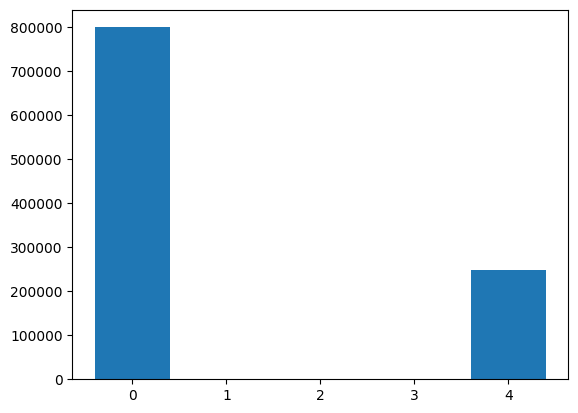

In [ ]:
plt.bar(twitter[twitter.columns[0]].value_counts().index, twitter[twitter.columns[0]].value_counts())
plt.show()

In [ ]:
twitter = twitter.drop(labels = ['id of the tweet', 'date of the tweet', 'query',
       'user'], axis = 1)
twitter.head(6)

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
5,0,Need a hug


In [ ]:
twitter['sentiment'] = twitter['polarity of tweet\xa0'].apply(lambda x: 1 if x == 4 else 0)
twitter['sentiment'].value_counts()

sentiment
0    799996
1    248576
Name: count, dtype: int64

In [ ]:
twitter = twitter.drop(labels = ['polarity of tweet\xa0'], axis = 1)
twitter.columns = ['sentence', 'sentiment']
twitter.head(6)

,sentence,sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
5,Need a hug,0


In [ ]:
# I think mentions can be misleading to the model training as they could be named after verbs but not actually used as verbs for example. So let's remove them
def remove_mention(tweet):
  mention = re.compile(r'@[\w]+')
  return mention.sub('', tweet)

twitter['sentence'] = twitter['sentence'].apply(remove_mention)
twitter.head(8)

,sentence,sentiment
0,is upset that he can't update his Facebook by ...,0
1,I dived many times for the ball. Managed to s...,0
2,my whole body feels itchy and like its on fire,0
3,"no, it's not behaving at all. i'm mad. why am...",0
4,not the whole crew,0
5,Need a hug,0
6,"hey long time no see! Yes.. Rains a bit ,onl...",0
7,I just re-pierced my ears,0


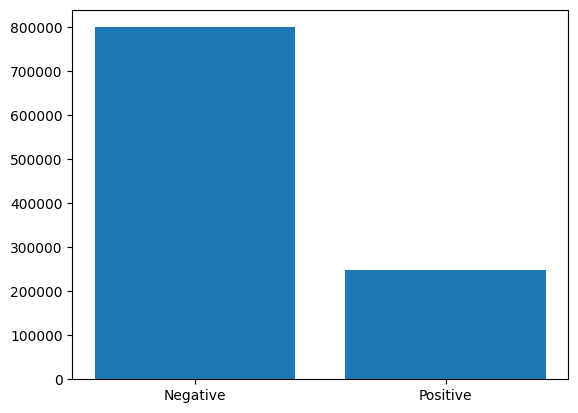

In [ ]:
plt.bar(['Negative', 'Positive'], twitter['sentiment'].value_counts())
plt.show()

In [ ]:
# Having such a huge difference could make the model more biased towards negative sentiments, so let's truncate some negative sentiments

negatives = twitter[twitter['sentiment'] == 0]
twitter.drop(negatives.index[:500000], axis = 0, inplace = True)
twitter['sentiment'].value_counts()

sentiment
0    299996
1    248576
Name: count, dtype: int64

**Now that all datasets are ready for preprocessing, I want to merge them into one combined dataset to make things easier**

In [ ]:
all = pd.concat([amazon, imdb, yelp, twitter], axis = 0)
all.head(6)

,sentence,sentiment
0,Good case Excellent value.,1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
5,If you have several dozen or several hundred c...,0


In [ ]:
all.shape

(550591, 2)

**After we have finished organizing the Datasets and combining them, lets start preprocessing, cleaning the unimportant characters, tokenization, etc**

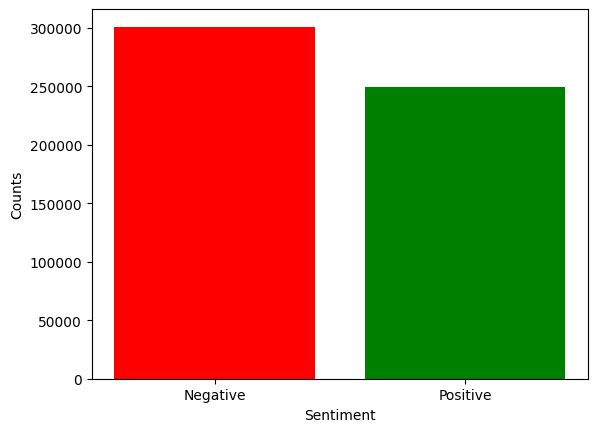

In [ ]:
plt.bar(['Negative', 'Positive'], all['sentiment'].value_counts(), color = ['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [ ]:
all['sentence'][0]

0                          Good case  Excellent value.
0    Not sure who was more lost - the flat characte...
0                                   Crust is not good.
Name: sentence, dtype: object

In [ ]:
# it appears that after merging the datasets, the indices have not been updated

all = all.reset_index(drop = True) # This method resets the indices values and drop the old indices column
all.head(6)

,sentence,sentiment
0,Good case Excellent value.,1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
5,If you have several dozen or several hundred c...,0


In [ ]:
print(all['sentence'][0])
print(all['sentence'][500])
print(all['sentence'][1000])
print(all['sentence'][1500])
print(all['sentence'][100000])

 # Solved!

Good case  Excellent value.
This battery is an excellent bargain!
Attempting artiness with black & white and clever camera angles  the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
This place is a jewel in Las Vegas  and exactly what I've been hoping to find in nearly ten years living here.
Why is it so hot tonight! And not got enough during the day! Can't sleep 


In [ ]:
nltk.download('stopwords')


def clean(text):
  text = text.lower()

  # Remove punctuation and numbers
  SUB = re.compile(r'[^a-zA-Z]')
  text = SUB.sub(' ', text)

  # Remove multiple spaces
  text = re.sub(r'\s+', ' ', text)

  # Remove single words
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

  # remove stop words
  expression = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = expression.sub('', text)

  return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# let's test our function

print(all['sentence'][0], '\n', clean(all['sentence'][0]), '\n')

print(clean("my name is MAngOs's FArMer, I         really like watermelons in the peak heat of summer."))

Good case  Excellent value. 
 good case excellent value  

name mangos farmer really like watermelons peak heat summer 


In [ ]:
x = []
sentence_list = list(all['sentence'])

for sentence in sentence_list:
  x.append(clean(sentence))

print(x[1456])

like steiners dark feels like bar 


In [ ]:
y = list(all['sentiment'])
y[1: 8]

[1, 0, 1, 0, 0, 1, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 38)

#Embedding Layer

In [ ]:
# Embedding Layer needs the text to be in numeric form, so we tokenize the words and transform them into numeric sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train[0]

[350]

In [ ]:
# Still, God Only knows why we add 1 here :(
vocab_length = len(tokenizer.word_index) + 1
vocab_length

132323

In [ ]:
tokenizer.word_index

{'day': 1,
 'good': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'http': 7,
 'today': 8,
 'work': 9,
 'going': 10,
 'got': 11,
 'love': 12,
 'time': 13,
 'lol': 14,
 'back': 15,
 'one': 16,
 'im': 17,
 'know': 18,
 'really': 19,
 'com': 20,
 'amp': 21,
 'see': 22,
 'still': 23,
 'want': 24,
 'night': 25,
 'well': 26,
 'think': 27,
 'home': 28,
 'new': 29,
 'oh': 30,
 'miss': 31,
 'thanks': 32,
 'need': 33,
 'much': 34,
 'morning': 35,
 'last': 36,
 'hope': 37,
 'twitter': 38,
 'great': 39,
 'tomorrow': 40,
 'feel': 41,
 'sad': 42,
 'happy': 43,
 'wish': 44,
 'haha': 45,
 'bad': 46,
 'sleep': 47,
 'would': 48,
 'right': 49,
 'fun': 50,
 'sorry': 51,
 'tonight': 52,
 'make': 53,
 'come': 54,
 'though': 55,
 'getting': 56,
 'way': 57,
 'gonna': 58,
 'better': 59,
 'bed': 60,
 'could': 61,
 'nice': 62,
 'bit': 63,
 'week': 64,
 'yeah': 65,
 'wait': 66,
 'hate': 67,
 'people': 68,
 'watching': 69,
 'even': 70,
 'twitpic': 71,
 'days': 72,
 'next': 73,
 'school': 74,
 'dont': 75,
 'never

In [ ]:
# Make all sentences of the same length using pad_sequences method

maxlen = 30
x_train = pad_sequences(x_train, padding = 'post', maxlen = maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen = maxlen)

x_train[6]

array([   30,   186,  1871,    15,     9,    40, 51891,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [ ]:
# Load GloVe word embeddings and create an Embedding Dictionary 'I still don't understand this part clearly'

from numpy import asarray
from numpy import zeros

embedding_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Project8_SentimentAnalysis_with_NeuralNetwork/a2_glove.6B.100d.txt', encoding = 'utf-8')

for line in glove_file:
  values = line.split()
  word = values[0]
  vector_dimensions = asarray(values[1:], dtype = 'float32')
  embedding_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
# Embedding Matrix having 100 columns

embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector


In [ ]:
embedding_matrix.shape

(132323, 100)

In [ ]:
tokenizer.word_index.items()

dict_items([('day', 1), ('good', 2), ('get', 3), ('like', 4), ('go', 5), ('quot', 6), ('http', 7), ('today', 8), ('work', 9), ('going', 10), ('got', 11), ('love', 12), ('time', 13), ('lol', 14), ('back', 15), ('one', 16), ('im', 17), ('know', 18), ('really', 19), ('com', 20), ('amp', 21), ('see', 22), ('still', 23), ('want', 24), ('night', 25), ('well', 26), ('think', 27), ('home', 28), ('new', 29), ('oh', 30), ('miss', 31), ('thanks', 32), ('need', 33), ('much', 34), ('morning', 35), ('last', 36), ('hope', 37), ('twitter', 38), ('great', 39), ('tomorrow', 40), ('feel', 41), ('sad', 42), ('happy', 43), ('wish', 44), ('haha', 45), ('bad', 46), ('sleep', 47), ('would', 48), ('right', 49), ('fun', 50), ('sorry', 51), ('tonight', 52), ('make', 53), ('come', 54), ('though', 55), ('getting', 56), ('way', 57), ('gonna', 58), ('better', 59), ('bed', 60), ('could', 61), ('nice', 62), ('bit', 63), ('week', 64), ('yeah', 65), ('wait', 66), ('hate', 67), ('people', 68), ('watching', 69), ('even', 

# LSTM Model

In [ ]:
lstm = Sequential()
embeddingLayer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)

lstm.add(embeddingLayer)
lstm.add(LSTM(128))

lstm.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(lstm.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      13,232,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,232,300 (50.48 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13,232,300 (50.48 MB)

None


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
lstm_history = lstm.fit(x_train, y_train, batch_size = 128, epochs = 6, verbose = 1, validation_split = 0.2)

Epoch 1/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 168s 60ms/step - acc: 0.7141 - loss: 0.5502 - val_acc: 0.7591 - val_loss: 0.5017
Epoch 2/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 166s 60ms/step - acc: 0.7647 - loss: 0.4809 - val_acc: 0.7655 - val_loss: 0.4765
Epoch 3/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 166s 60ms/step - acc: 0.7769 - loss: 0.4635 - val_acc: 0.7733 - val_loss: 0.4705
Epoch 4/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 167s 61ms/step - acc: 0.7863 - loss: 0.4493 - val_acc: 0.7764 - val_loss: 0.4630
Epoch 5/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 166s 60ms/step - acc: 0.7943 - loss: 0.4350 - val_acc: 0.7785 - val_loss: 0.4592
Epoch 6/6
2753/2753 ━━━━━━━━━━━━━━━━━━━━ 168s 61ms/step - acc: 0.8022 - loss: 0.4205 - val_acc: 0.7779 - val_loss: 0.4604


In [ ]:
score = lstm.evaluate(x_test, y_test, verbose = 1)

3442/3442 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - acc: 0.7772 - loss: 0.4602


In [ ]:
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.46069324016571045
Test Accuracy:  0.7768505215644836


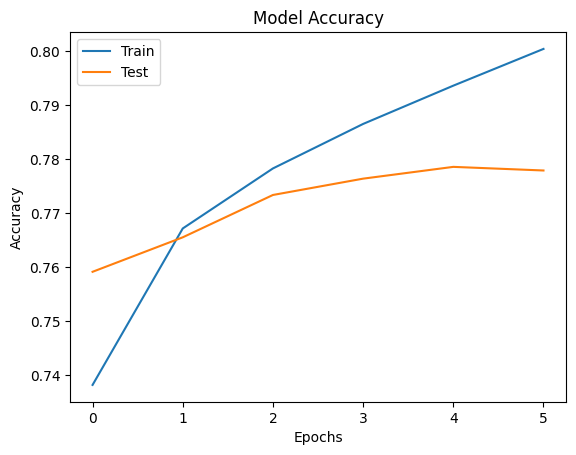

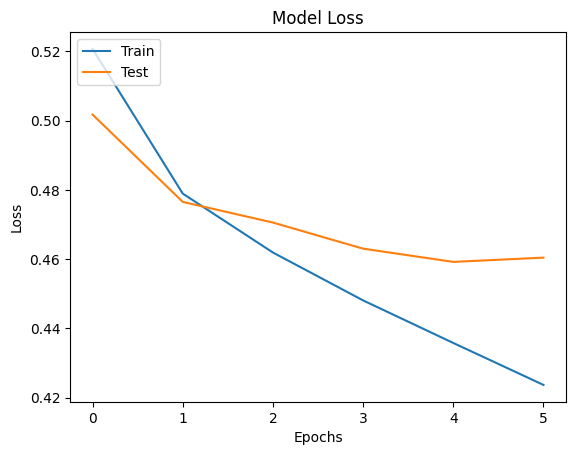

In [ ]:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()



plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


In [ ]:
lstm.save(f"./lstm_acc{round(score[1], 3)}.h5", save_format = 'h5')

# Predictions

In [ ]:
# Load the model

from keras.models import load_model
trained = load_model('/content/lstm_acc0.777.h5')
trained.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 30, 100)             │      13,232,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,349,679 (50.92 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 13,232,300 (50.48 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
test = []
s1 = "I dont know you"
s2 = "I love potatos"
s3 = "its really lovely seeing you hear"

test.append(clean(s1))
test.append(clean(s2))
test.append(clean(s3))

test = tokenizer.texts_to_sequences(test)

test = pad_sequences(test, padding = 'post', maxlen = maxlen)

sentiment = trained.predict(test)
(sentiment * 10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.5984914],
       [5.856643 ],
       [9.178366 ]], dtype=float32)

In [ ]:
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_json)